<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S10_C1_C_means_Fuzzy%2Bkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo tomado de: [scikit-fuzzy](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html)

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick
  ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-free

In [ ]:
!pip install scikit-fuzzy

In [ ]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers

In [ ]:

centers = [[1, 5],
           [3, 5],
           [1, 2],
           [3, 1]]



# Define three cluster sigmas in x and y, respectively

In [ ]:

sigmas = [[0.9, 0.1],
          [0.5, 0.9],
          [0.6, 1.1],
          [0.5, 0.5]]



In [ ]:
# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

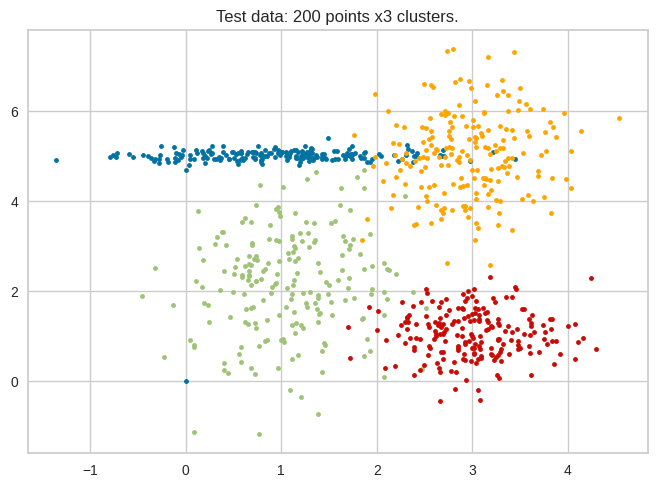

In [ ]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(4):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# Fuzzy c-means clustering

Los principios de la lógica difusa se pueden utilizar para agrupar datos multidimensionales, asignando a cada punto una membresía en cada centro del grupo del 0 al 100 por ciento. Esto puede ser muy poderoso en comparación con la agrupación tradicional con umbrales estrictos, donde a cada punto se le asigna una etiqueta exacta y nítida.

La agrupación difusa de c-means se logra a través de skfuzzy.cmeans, y la salida de esta función se puede reutilizar para clasificar datos nuevos de acuerdo con los grupos calculados (también conocidos como predicción) a través de skfuzzy.cmeans_predict

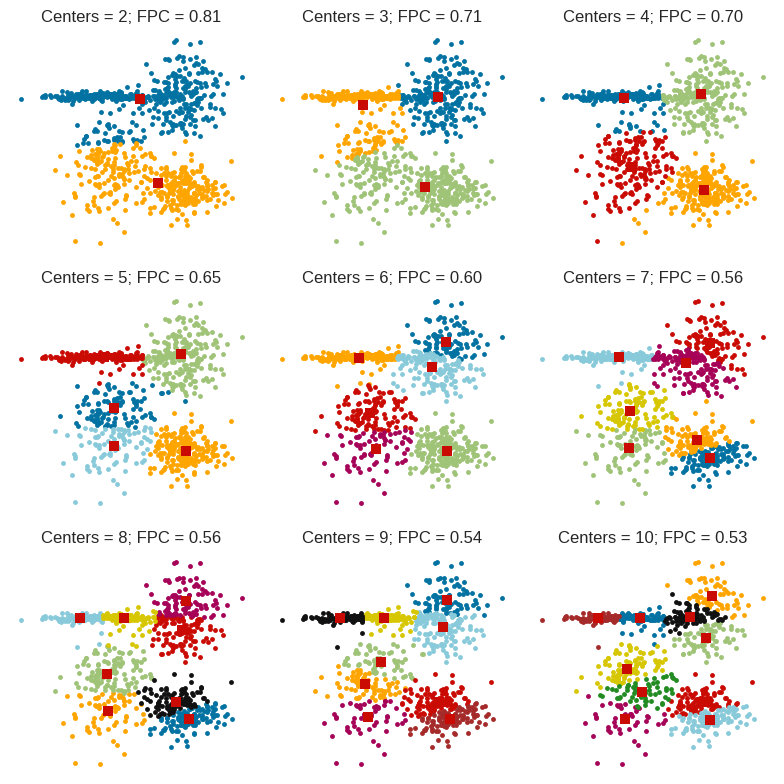

In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)


    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)

    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

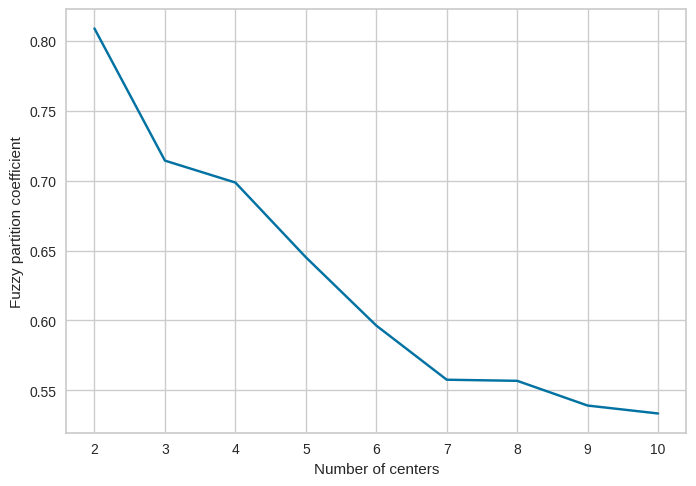

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [ ]:
import pandas as pd

data = pd.DataFrame({'x': xpts, 'y': ypts})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       801 non-null    float64
 1   y       801 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB


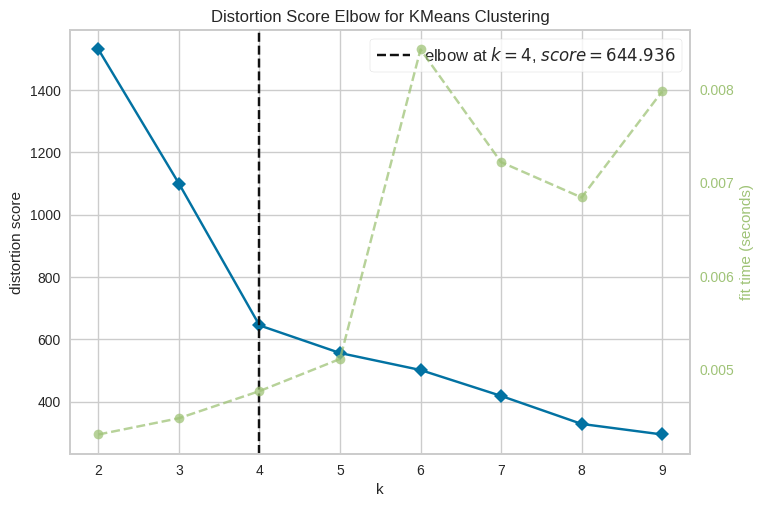

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data)
visualizer.show()
plt.show()

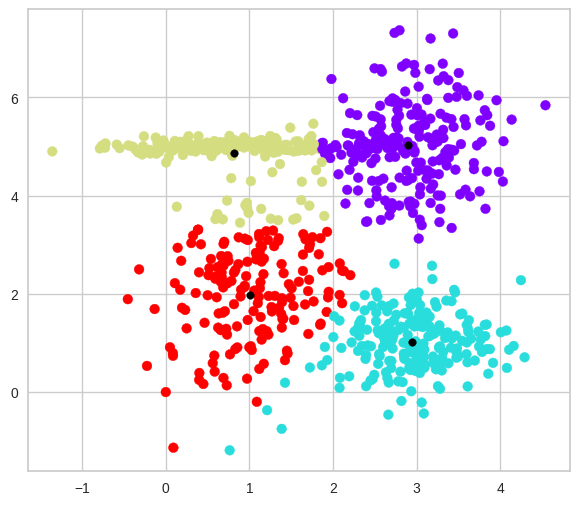

In [ ]:
modelo_4k = KMeans(n_clusters=4, random_state=1).fit(data)
plt.figure(figsize=(7, 6))
plt.scatter(x = data['x'], y= data['y'], c= modelo_4k.labels_, cmap='rainbow')

modelo_4k.cluster_centers_
plt.scatter(x = modelo_4k.cluster_centers_[:, 0], y = modelo_4k.cluster_centers_[:, 1], s=30, c='black')
plt.show()

**K-Means => Metodo del codo:**
los datos se agrupan de manera circular, dado que KMeans se basa en la distancia simulando un radio de accion (por eso se habla de grupos circulares) cuando hay  **incertidumbre**, es decir, que existe la posibilidad que algunos de los datos pertenecen a mas de un grupo. Usando el metodo del codo el numero de clusters recomendados es cuatro como se observaen la gráfica

**C-Means => Fuzzy-Means:**
La **incertidumbre** sigue presente en este metodo, sin embargo CMeans no tiene contornos circulares lo que permite disminuir el numero de regiones con incertidumbre; con este metodo re recomiendan dos grupos.

**Incertidumbre**: situacion en la cual un o varios datos estan presentes en dos o mas clusters

En conclusion con el metodo de KMeans al usar cuatro centroides se observan grupos con distribuciones circulares mientras que con CMeans se obtiene dos grupos pero su forma es irregular

abrir drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/Capsulas/S10_C1_C_means_Fuzzy+kmeans.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/Capsulas/S10_C1_C_means_Fuzzy+kmeans.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instea